In [1]:
import ujson
import datetime as dt
import pandas as pd
import numpy as np
import pylab as pl
import seaborn as sns
import scipy.fftpack as ff
import scipy.stats as ss

# from sklearn.gaussian_process import GaussianProcess

%pylab inline

Populating the interactive namespace from numpy and matplotlib


/usr/local/lib/python2.7/site-packages/matplotlib/__init__.py:872: UserWarning: axes.color_cycle is deprecated and replaced with axes.prop_cycle; please use the latter.
  warnings.warn(self.msg_depr % (key, alt_key))


In [2]:
ingnored_dates = set([dt.date(2015, 3, 7), dt.date(2015, 3, 8), dt.date(2015, 2, 13), dt.date(2015, 2, 14), dt.date(2015, 1, 6), dt.date(2015, 1, 7), dt.date(2015, 4, 11), 
                  dt.date(2015, 4, 12), dt.date(2015, 2, 22), dt.date(2015, 2, 23), dt.date(2015, 5, 8), dt.date(2015, 5, 9), dt.date(2015, 1, 25), dt.date(2015, 1, 18), 
                  dt.date(2015, 1, 19), dt.date(2015, 3, 31), dt.date(2015, 4, 1), dt.date(2015, 6, 20), dt.date(2015, 6, 21), dt.date(2015, 7, 8), dt.date(2015, 5, 11), 
                  dt.date(2015, 5, 12), dt.date(2015, 7, 11), dt.date(2015, 1, 13), dt.date(2015, 1, 14), dt.date(2015, 4, 30), dt.date(2015, 5, 1), dt.date(2015, 11, 29), 
                  dt.date(2015, 2, 20), dt.date(2015, 10, 5), dt.date(2015, 5, 15), dt.date(2015, 3, 26), dt.date(2015, 5, 28), dt.date(2015, 10, 25), dt.date(2015, 1, 1), 
                  dt.date(2015, 11, 10), dt.date(2015, 11, 21), dt.date(2015, 9, 1), dt.date(2015, 6, 1), dt.date(2015, 7, 25), dt.date(2015, 6, 12), dt.date(2015, 8, 9), 
                  dt.date(2015, 2, 17), dt.date(2015, 9, 27), dt.date(2015, 7, 31), dt.date(2015, 3, 27), dt.date(2015, 9, 28)])

In [3]:
lines = []
with open("/Users/anokhin/Desktop/presents_2015_1x_N_1M.txt") as tlf:
    for line in tlf:
        uid, json_str = line.strip().split("\t")
        
#         if uid.startswith("B:"):
#             continue
        
        json = ujson.loads(json_str)
        
        data = {"uid": uid}
        for day, stats in json:            
            date = dt.datetime.strptime(day, "%Y%m%d").date()
            
            if date in ingnored_dates:
                continue
            
            for price_str, count in stats.iteritems():
                price = int(price_str)
                data[price] = data.get(price, 0) + count
                
        lines.append(data)
        
#         if len(lines) > 100000:
#             break

dates = [dt.date(2015, 10, 1) + dt.timedelta(days=i) for i in xrange(61)]
df = pd.DataFrame(lines, columns=['uid'] + range(1, 101)).set_index(['uid']).fillna(0)

df.head()

,1,2,3,4,5,6,7,8,9,10,...,91,92,93,94,95,96,97,98,99,100
uid,,,,,,,,,,,,,,,,,,,,,
N:477572420068,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
N:540871725975,11,0,1,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
N:535924413189,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
N:552389804601,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
N:557086936215,20,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


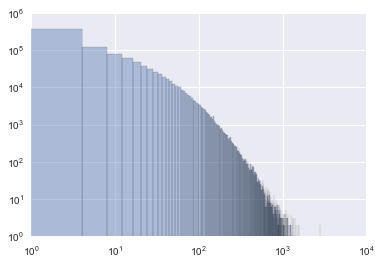

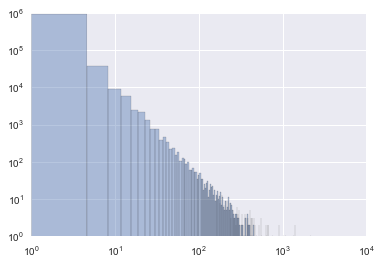

In [4]:
sns.distplot(df.sum(axis=1), kde=False, rug=False, bins=1000)
pl.gca().set_xscale('log')
pl.gca().set_yscale('log')
pl.show()

a = 2.4
m = 1e+8
sam = np.random.zipf(a, 1000000)
sns.distplot(sam[sam < 1e+4], kde=False, rug=False, bins=1000)
pl.gca().set_xscale('log')
pl.gca().set_yscale('log')
pl.show()

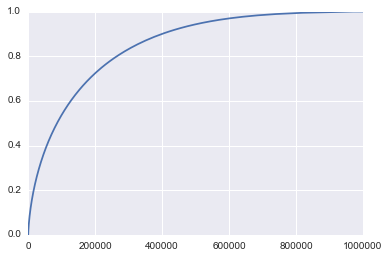

,1,2,3,4,5,6,7,8,9,10,...,91,92,93,94,95,96,97,98,99,100
uid,,,,,,,,,,,,,,,,,,,,,
N:559945857746,8,8,2,2,2,0,2,0,0,0,...,0,0,0,0,0,0,0,0,0,0
N:565766549531,39,9,1,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
N:570746648544,8,1,0,0,2,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
N:554543666534,13,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
N:463094453884,14,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
N:573658475546,19,5,0,0,0,0,2,0,0,1,...,0,0,0,0,0,0,0,0,0,0
N:509108861320,115,3,4,6,3,0,0,0,0,4,...,0,0,0,0,0,0,0,0,0,0
N:563030498967,108,10,2,3,12,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
N:570579162666,20,4,2,0,2,0,1,0,0,1,...,0,0,0,0,0,0,0,0,0,0


In [5]:
spent = pd.Series(df.values.sum(axis=1), index=df.index)

pl.plot(arange(df.shape[0]), np.cumsum(spent.sort_values(ascending=False)) / spent.sum())
pl.show()

# Take users that generate 80% of income and then sample from them
dfs = df.ix[spent.sort_values(ascending=False).index[1000:401000]].sample(100000)

dfs.head(1000)

In [6]:
dfs.sum(axis=1).min(), dfs.sum(axis=1).max()

(14.0, 575.0)

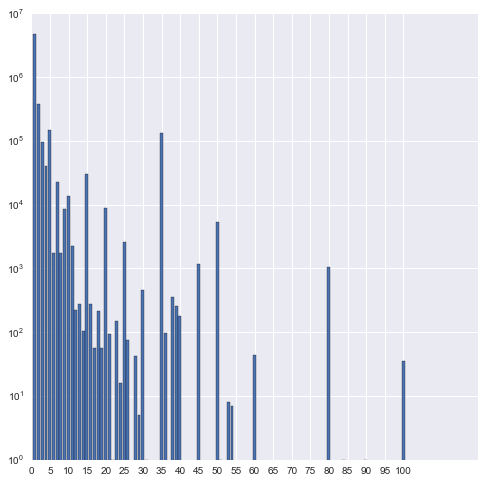

In [7]:
pl.figure(figsize=(8, 8))

pl.bar(np.arange(100) + 0.5, dfs.values.sum(axis=0))
pl.gca().set_yscale('log')
pl.xticks(range(0, 101, 5))

pl.show()

/usr/local/lib/python2.7/site-packages/pandas/core/frame.py:1997: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  "DataFrame index.", UserWarning)


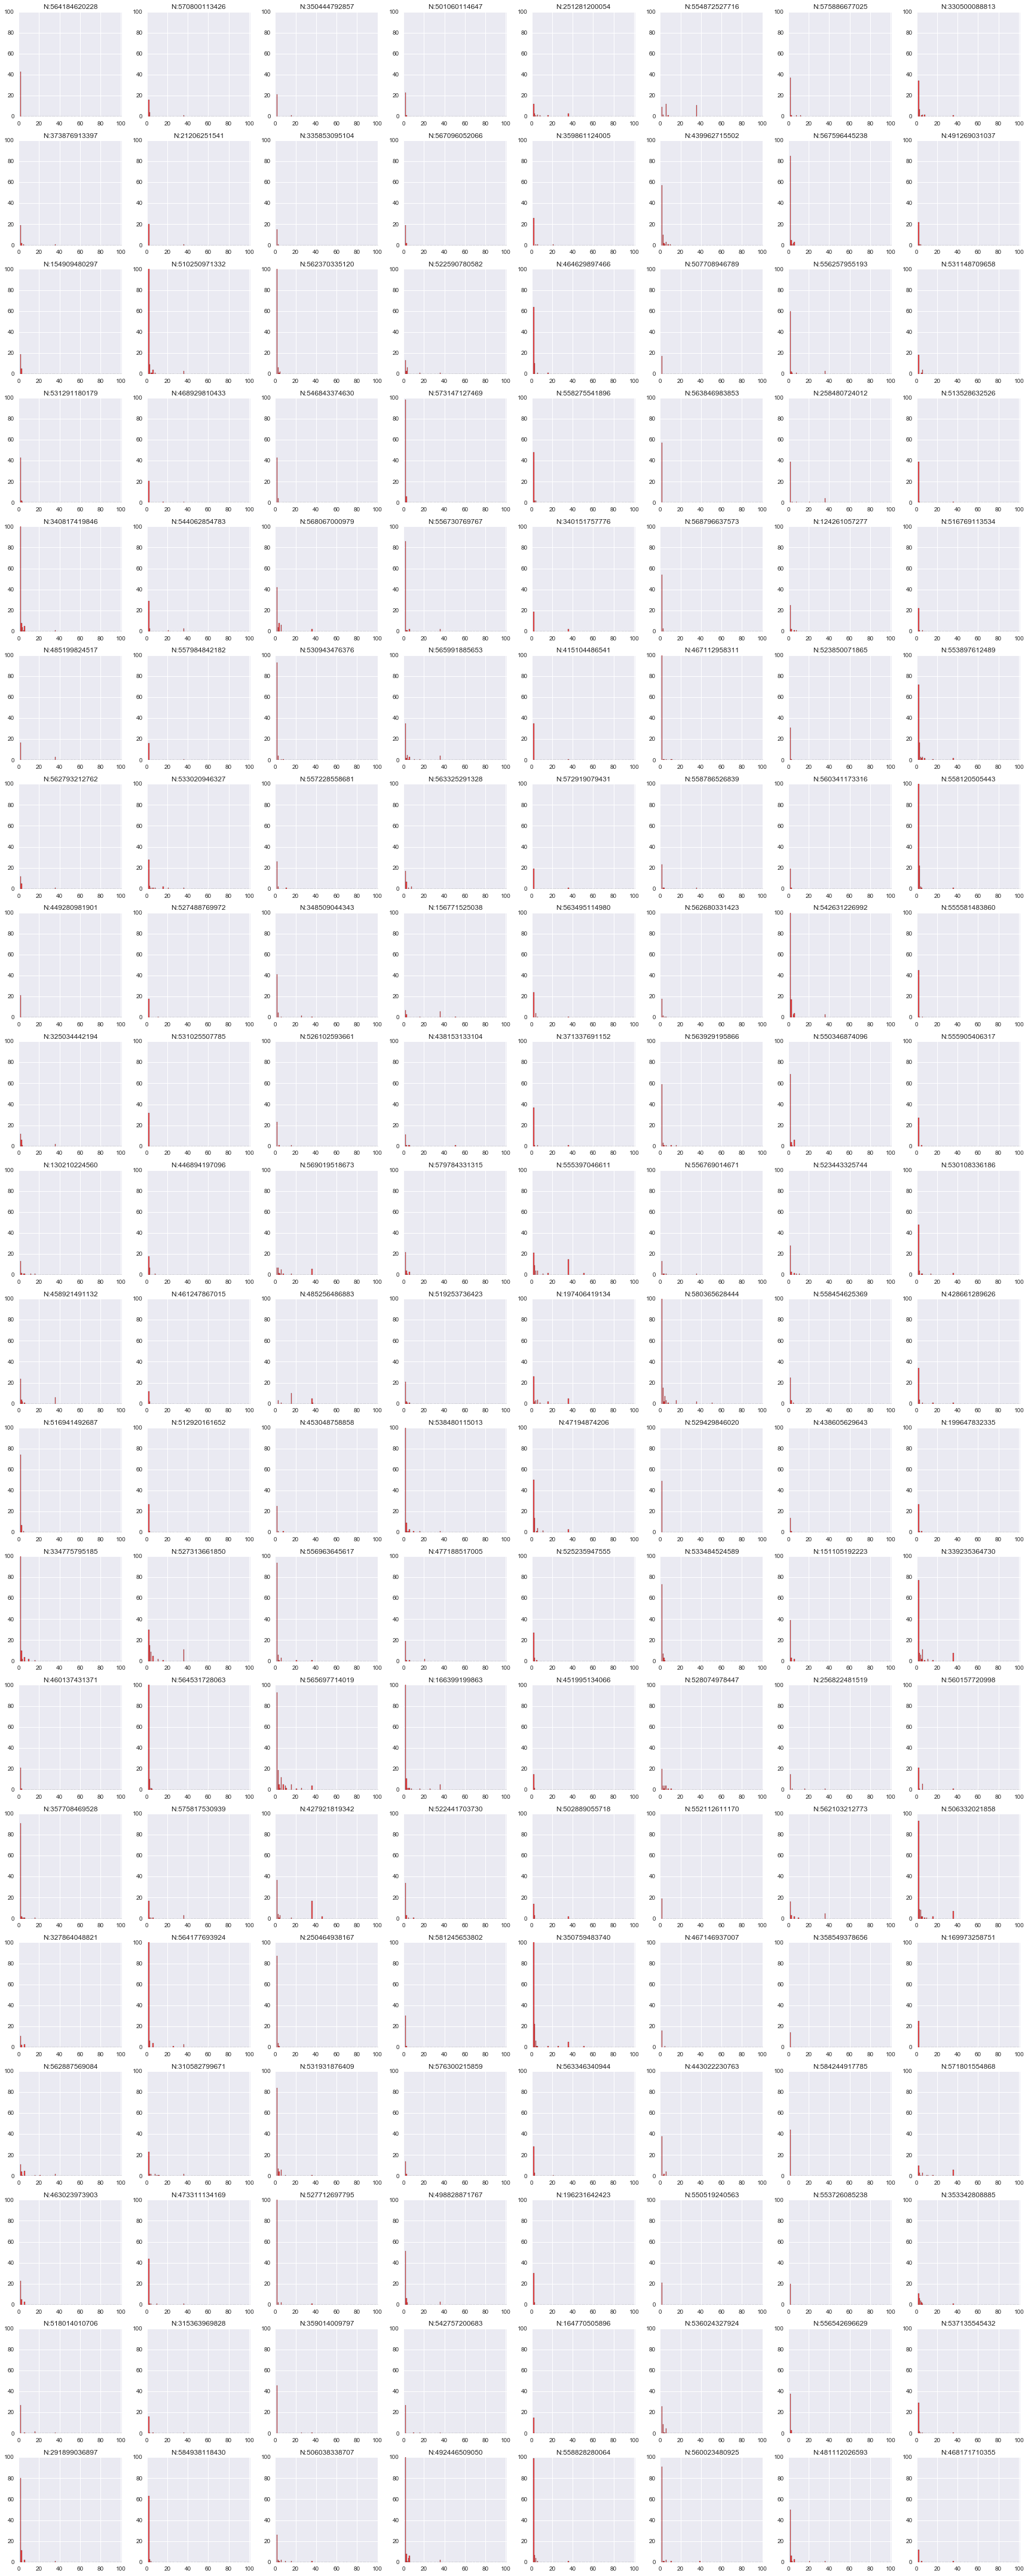

In [8]:
def visualize_dist(dfx, N=None, M=None, color='r'):
    if N is None:
        N = np.ceil(np.sqrt(dfx.shape))
        M = np.ceil(np.sqrt(dfx.shape))

    fig = pl.figure(figsize=(M*3, N*3))

    for i, (uid, row) in enumerate(dfx.sample(N*M).iterrows()):
        ax = pl.subplot(N, M, i + 1)
#         print row.index, row.values
        ax.bar(row.index + 0.5, row.values, color=color, alpha=0.7)
        pl.title(uid)
        pl.xticks(range(0, 101, 20))
        pl.xlim(0, 101)
        pl.ylim(0, 100)
    
    fig.tight_layout()
    pl.show()
    
visualize_dist(dfs[spent > 10], 20, 8)

In [9]:
with open("/Users/anokhin/Desktop/okids.txt", "w") as of:
    for okid in dfs.index.tolist():
        print >> of, okid

## Join with targets

In [47]:
lines = []
with open("/Users/anokhin/Desktop/targets_20151x.txt") as tarf:
    for line in tarf:
        uid, json_str = line.strip().split("\t")    
        data = {"uid": "N:" + uid}
        for feature, value in ujson.loads(json_str):
            data[feature] = value
            
        lines.append(data)
        
#         if len(lines) > 100:
#             break
        
dft = pd.DataFrame(lines).set_index(['uid']).fillna(0)
dft.head()

,A:10012,A:10013,A:10014,A:10015,A:10053,A:10249,A:10251,A:10252,A:10254,A:10255,...,inc:1,inc:2,inc:3,inc:4,inc:5,is_male:False,is_male:True,ltv:1,ltv:2,ltv:3
uid,,,,,,,,,,,,,,,,,,,,,
N:161621863872,0,0,0,31,0,0,0,0,0,0,...,0,31,17,0,0,31,0,4,31,3
N:192972656491,0,0,0,12,0,0,0,0,0,0,...,0,0,11,0,3,3,31,3,13,3
N:263319620032,0,0,18,28,0,0,4,0,0,0,...,10,24,12,0,0,28,20,0,25,18
N:266687023357,2,0,0,13,0,3,0,0,0,0,...,0,6,0,5,7,0,13,0,13,5
N:268454045180,0,0,0,11,0,0,0,0,0,0,...,8,17,0,5,0,28,1,27,3,0


In [52]:
dfm = pd.merge(dfs, dft, left_index=True, right_index=True)
dfm.head()

,1,2,3,4,5,6,7,8,9,10,...,inc:1,inc:2,inc:3,inc:4,inc:5,is_male:False,is_male:True,ltv:1,ltv:2,ltv:3
uid,,,,,,,,,,,,,,,,,,,,,
N:161621863872,25,3,1,0,4,0,0,0,0,1,...,0,31,17,0,0,31,0,4,31,3
N:192972656491,25,2,0,1,2,0,0,0,0,0,...,0,0,11,0,3,3,31,3,13,3
N:263319620032,42,1,1,0,1,0,0,0,0,0,...,10,24,12,0,0,28,20,0,25,18
N:266687023357,9,5,0,1,0,0,0,0,0,1,...,0,6,0,5,7,0,13,0,13,5
N:268454045180,85,3,1,0,1,0,0,0,0,0,...,8,17,0,5,0,28,1,27,3,0


In [54]:
for c in dft.columns:
    if not c.startswith("A:"):
        print c

age:0
age:10
age:100
age:110
age:20
age:30
age:40
age:50
age:60
age:70
age:80
age:90
edu:1
edu:2
emp:1
emp:2
fam:1
fam:2
inc:1
inc:2
inc:3
inc:4
inc:5
is_male:False
is_male:True
ltv:1
ltv:2
ltv:3


In [71]:
dfm["int_0"] = (dfm["is_male:True"] > dfm["is_male:False"]).astype(int)  # is_male: int_0
dfm["int_1"] = (dfm["age:0"] + dfm["age:10"] + dfm["age:20"] > dfm["age:30"] + dfm["age:40"] + dfm["age:50"] + dfm["age:60"] + dfm["age:70"] + dfm["age:80"] + dfm["age:90"] + dfm["age:100"]).astype(int) # is_young
dfm["int_2"] = (dfm["age:0"] + dfm["age:10"] + dfm["age:20"] + dfm["age:30"] + dfm["age:40"] < dfm["age:50"] + dfm["age:60"] + dfm["age:70"] + dfm["age:80"] + dfm["age:90"] + dfm["age:100"]).astype(int) # is_old
dfm["int_3"] = (dfm["inc:5"] + dfm["inc:4"] > dfm["inc:3"] + dfm["inc:2"] + dfm["inc:1"]).astype(int) # is_rich: int_2
dfm["int_4"] = (dfm["edu:1"] < dfm["edu:2"]).astype(int) # is_educated
dfm["int_5"] = (dfm["fam:1"] < dfm["fam:2"]).astype(int) # is_family
dfm["int_6"] = (dfm["emp:1"] < dfm["emp:2"]).astype(int) # is_married

dfx = dfm[["int_%d" % i for i in xrange(7)] + range(1, 101)]
dfx.to_csv("/Users/anokhin/Desktop/train_set.csv")
dfx.head()

,int_0,int_1,int_2,int_3,int_4,int_5,int_6,1,2,3,...,91,92,93,94,95,96,97,98,99,100
uid,,,,,,,,,,,,,,,,,,,,,
N:161621863872,0,0,0,0,0,0,0,25,3,1,...,0,0,0,0,0,0,0,0,0,0
N:192972656491,1,0,0,0,0,0,0,25,2,0,...,0,0,0,0,0,0,0,0,0,0
N:263319620032,0,0,0,0,0,0,0,42,1,1,...,0,0,0,0,0,0,0,0,0,0
N:266687023357,1,0,1,1,0,0,0,9,5,0,...,0,0,0,0,0,0,0,0,0,0
N:268454045180,0,1,0,0,0,1,0,85,3,1,...,0,0,0,0,0,0,0,0,0,0


In [88]:
import sklearn.metrics as sm

for i in xrange(7):
    print "####### Interest %d" % i, np.bincount(dfx["int_%d" % i])
    for j in xrange(7):
        if i < j:
            cm = sm.confusion_matrix(dfx["int_%d" % i], dfx["int_%d" % j])
            print "int_%d VS int_%d\n==============\n%s\n==============" % (i, j, cm)
            print ss.chi2_contingency(cm)[1], ss.chi2_contingency(cm)[1] > 0.05 

####### Interest 0 [7608 1721]
int_0 VS int_1
[[5986 1622]
 [1262  459]]
1.72493990937e-06 False
int_0 VS int_2
[[5524 2084]
 [1306  415]]
0.00608436988189 False
int_0 VS int_3
[[6794  814]
 [1474  247]]
1.96909860663e-05 False
int_0 VS int_4
[[4828 2780]
 [ 880  841]]
3.43342046614e-21 False
int_0 VS int_5
[[4915 2693]
 [1019  702]]
3.02184157677e-05 False
int_0 VS int_6
[[5774 1834]
 [1357  364]]
0.00994307198137 False
####### Interest 1 [7248 2081]
int_1 VS int_2
[[4749 2499]
 [2081    0]]
9.53696194369e-215 False
int_1 VS int_3
[[6326  922]
 [1942  139]]
2.69692050368e-14 False
int_1 VS int_4
[[4631 2617]
 [1077 1004]]
1.67225370997e-23 False
int_1 VS int_5
[[4759 2489]
 [1175  906]]
1.8623298355e-14 False
int_1 VS int_6
[[5759 1489]
 [1372  709]]
1.9393869009e-37 False
####### Interest 2 [6830 2499]
int_2 VS int_3
[[6184  646]
 [2084  415]]
8.47907921959e-22 False
int_2 VS int_4
[[4000 2830]
 [1708  791]]
1.10917742516e-17 False
int_2 VS int_5
[[4247 2583]
 [1687  812]]
2.47473992

## PCA

In [38]:
from sklearn import decomposition
from sklearn import manifold
import scipy.cluster.hierarchy as sh

X = 1.0 * np.log1p(dfs.values) / (1e-6 + np.log1p(dfs.values).max(axis=0))

# np.tile((1e-6 + np.log1p(dfs.values).sum(axis=0)), X.shape[0]).reshape(dfs.values.shape)

tsne = manifold.TSNE(n_components=2, learning_rate=500, n_iter_without_progress=100, verbose=2)
Z = tsne.fit_transform(X[:10000])

[t-SNE] Computing pairwise distances...
[t-SNE] Computing 91 nearest neighbors...
[t-SNE] Computed conditional probabilities for sample 1000 / 10000
[t-SNE] Computed conditional probabilities for sample 2000 / 10000
[t-SNE] Computed conditional probabilities for sample 3000 / 10000
[t-SNE] Computed conditional probabilities for sample 4000 / 10000
[t-SNE] Computed conditional probabilities for sample 5000 / 10000
[t-SNE] Computed conditional probabilities for sample 6000 / 10000
[t-SNE] Computed conditional probabilities for sample 7000 / 10000
[t-SNE] Computed conditional probabilities for sample 8000 / 10000
[t-SNE] Computed conditional probabilities for sample 9000 / 10000
[t-SNE] Computed conditional probabilities for sample 10000 / 10000
[t-SNE] Mean sigma: 0.000000
[t-SNE] Iteration 25: error = 1.3999523, gradient norm = 0.0000535
[t-SNE] Iteration 25: gradient norm 0.000054. Finished.
[t-SNE] Iteration 50: error = 1.3977121, gradient norm = 0.0079373
[t-SNE] Iteration 75: error 

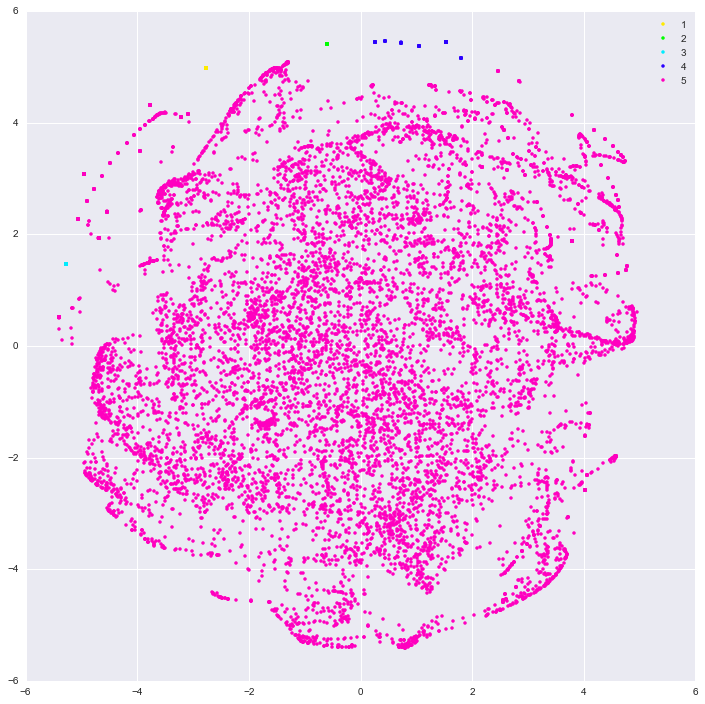

[   0   33   27   33  114 9793]


In [16]:
n_clust = 5
clustering = sh.fclusterdata(Z, n_clust, criterion='maxclust', method='single')

pl.figure(figsize=(12, 12))

cm = pl.get_cmap('gist_rainbow')
for c in np.unique(clustering):
    pl.plot(Z[clustering==c][:, 0], Z[clustering==c][:, 1], '.', color=cm(int(c*1.0/n_clust*256)), label=str(c))

pl.legend()
pl.show()

print np.bincount(clustering)

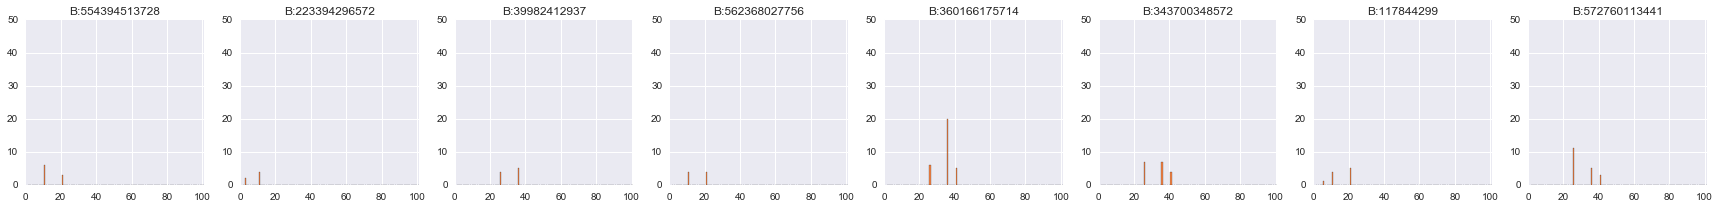

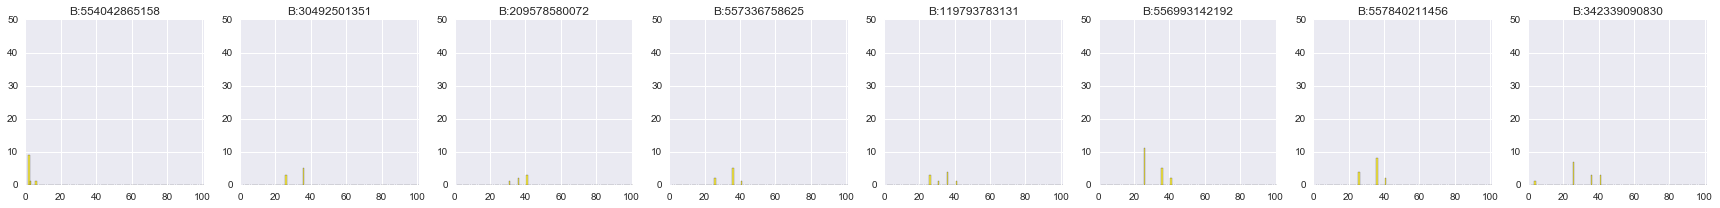

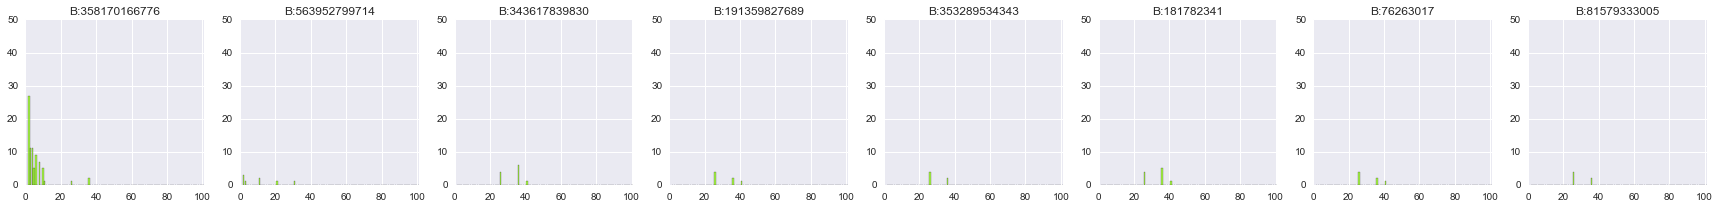

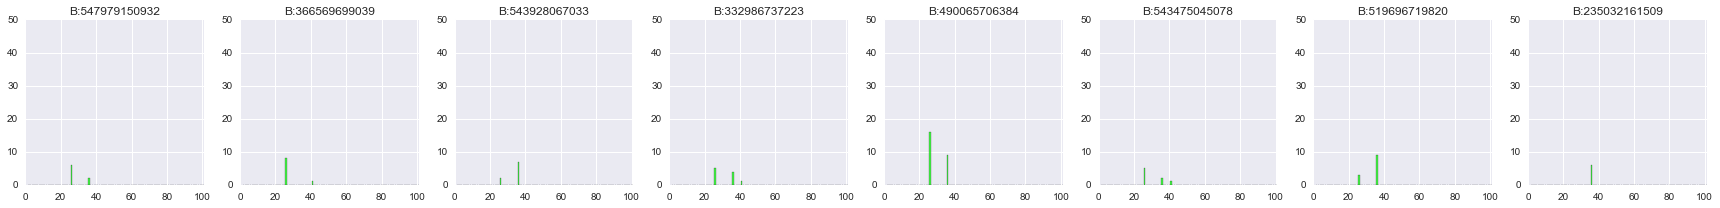

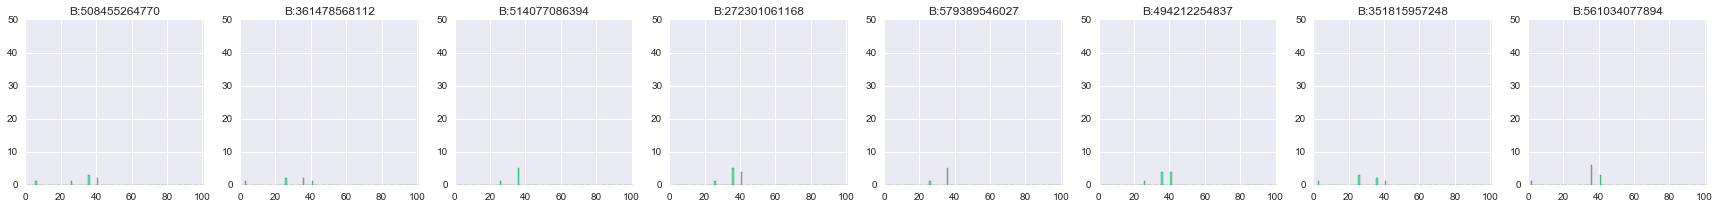

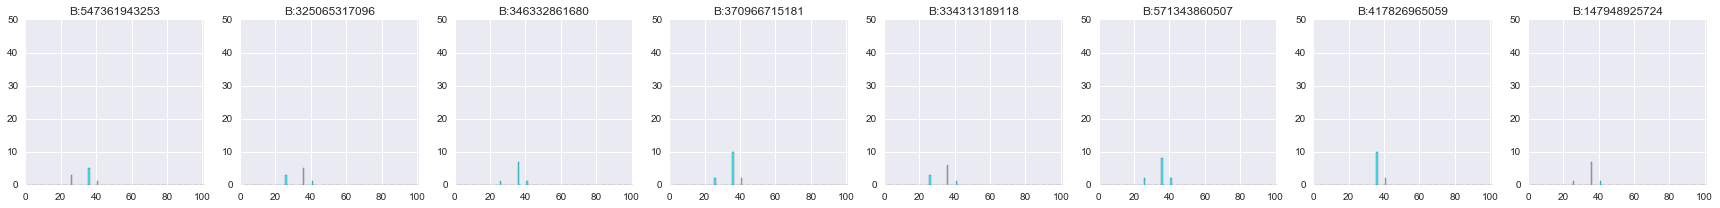

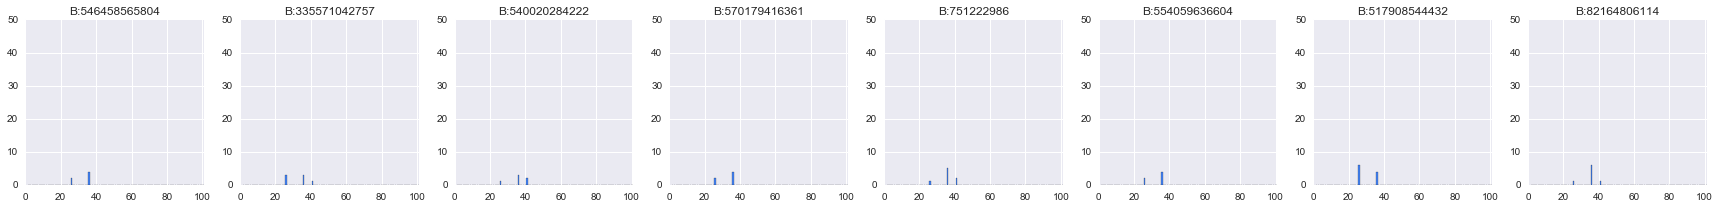

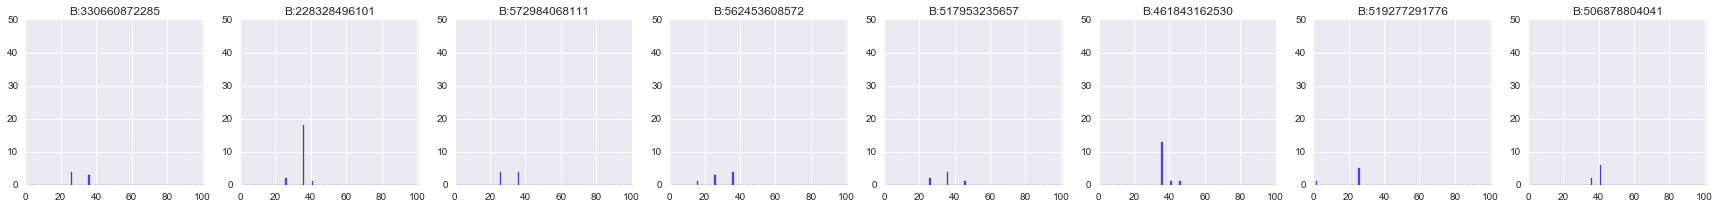

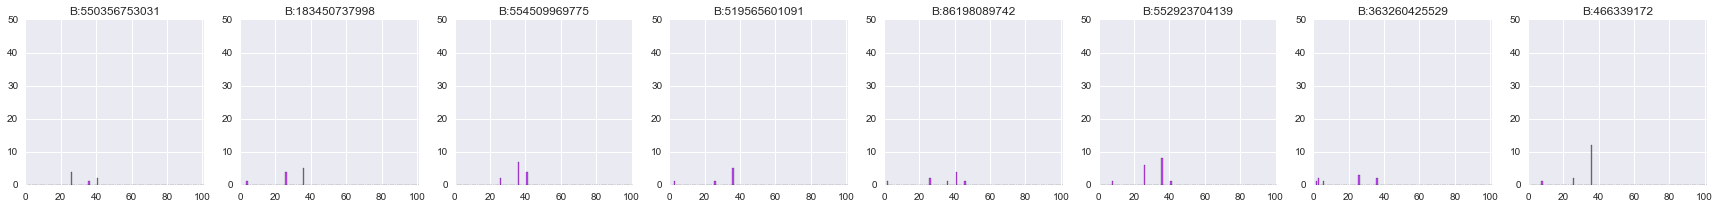

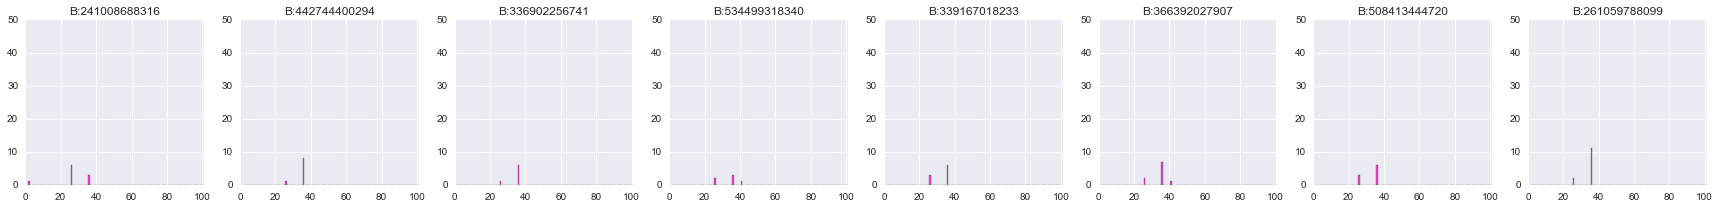

In [17]:
cm = pl.get_cmap('gist_rainbow')
for c in np.unique(clustering):
    visualize_dist(dfs[:10000][clustering == c], 1, 8, color=cm(int(c*1.0/n_clust*256)))

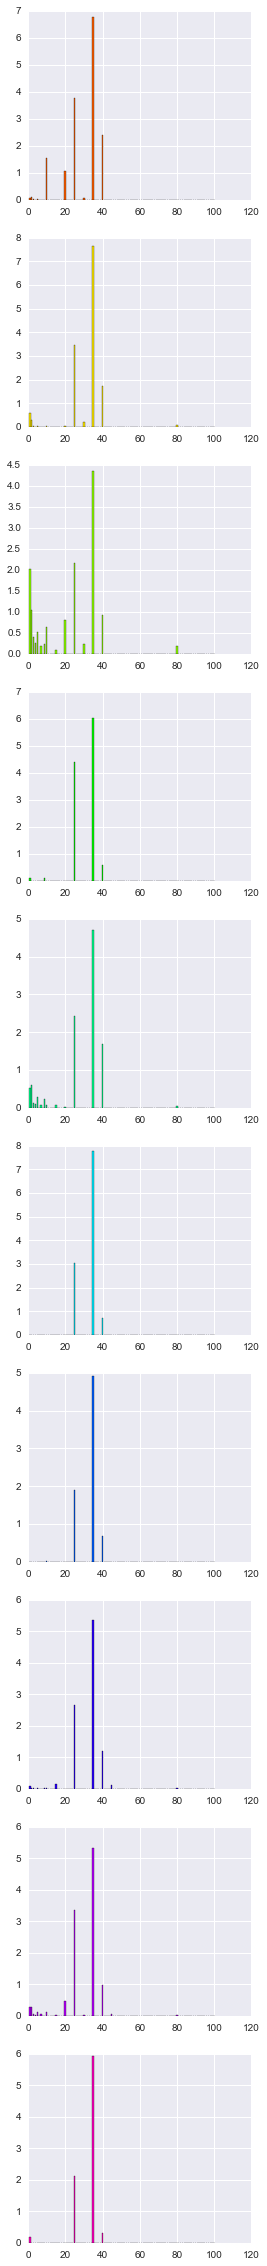

In [19]:
pl.figure(figsize=(4, n_clust * 4))
cm = pl.get_cmap('gist_rainbow')
for c in np.unique(clustering):
    agg = dfs[:10000][clustering == c].mean(axis=0)
    pl.subplot(n_clust, 1, c)
    pl.bar(np.arange(0, 100) + 0.5, agg.values, color=cm(int(c*1.0/n_clust*256)))
pl.show()